# Project Part 1: Text Processing and Exploratory Data Analysis

You are provided with a document corpus, which is an e-commerce fashion products dataset.
You can see an example document in the appendix.

In [2]:
import pandas as pd
import json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import regex as re
import os
import IPython.display 
IPython.display.clear_output()

In [ ]:
input_directory = "../IRWA-2025-data/"
input_name = "fashion_products_dataset.json"
input_path = os.path.join(input_directory, input_name)
df_fashion_products = pd.read_json(input_path)
print(df_fashion_products.info())
display(df_fashion_products.head(3))
print(df_fashion_products.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              28080 non-null  object        
 1   actual_price     28080 non-null  object        
 2   average_rating   28080 non-null  object        
 3   brand            28080 non-null  object        
 4   category         28080 non-null  object        
 5   crawled_at       28080 non-null  datetime64[ns]
 6   description      28080 non-null  object        
 7   discount         28080 non-null  object        
 8   images           28080 non-null  object        
 9   out_of_stock     28080 non-null  bool          
 10  pid              28080 non-null  object        
 11  product_details  28080 non-null  object        
 12  seller           28080 non-null  object        
 13  selling_price    28080 non-null  object        
 14  sub_category     28080 non-null  objec

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...


(28080, 17)


## PART 1: Data Preparation

In [ ]:
STEMMER = PorterStemmer()
STOP_WORDS = set(stopwords.words("english"))
STOP_WORDS.update({"nan", ""}) # extra

1. As a first step, you must pre-process the documents. In particular, for the text fields (title,
description) you should:
- Removing stop words
- Tokenization
- Removing punctuation marks
- Stemming
- and... anything else you think it's needed (bonus point)

In [ ]:
def build_terms(line: str) -> list[str]:
    """
    Preprocess a text removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Parameters:
        line (str): Text to be preprocessed.

    Returns:
        list[str]: Tokens corresponding to the input text after preprocessing.
    """
    line = line.lower()
    line = re.sub(r"[^a-zA-Z-]", " ", line) # extra
    line = line.split(" ")
    line = [word for word in line if word not in STOP_WORDS]
    line = [STEMMER.stem(word) for word in line]
    line = list(set(line)) # extra
    return line

In [ ]:
# WARNING: These lines are computationally expensive. Expected time: 45 s.
df_fashion_products_01 = df_fashion_products.copy()
df_fashion_products_01['title'] = df_fashion_products["title"].apply(build_terms).apply(" ".join)
df_fashion_products_01['description'] = df_fashion_products["description"].apply(build_terms).apply(" ".join)

display(df_fashion_products_01.head(3))

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,cotton trackpant design rich friendli look ind...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,women solid track pant multicolor,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,cotton trackpant design rich friendli look ind...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,solid track pant men blue,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,cotton trackpant design rich friendli look ind...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,solid track pant men multicolor,https://www.flipkart.com/yorker-solid-men-mult...


2. Take into account that for future queries, the final output must return (when present) the 
following information for each of the selected documents:  
pid, title, description,  brand,  category, sub_category, product_details, seller, out_of_stock, 
selling_price, discount, actual_price, average_rating, url

In [ ]:
selected_attributes = [
    "pid", "title", "description",  "brand",  "category", "sub_category", "product_details", 
    "seller", "out_of_stock", "selling_price", "discount", "actual_price", "average_rating", "url"
]

df_fashion_products_02 = df_fashion_products_01.copy()
df_fashion_products_02 = df_fashion_products_02[selected_attributes]

display(df_fashion_products_02.head(3))

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url
0,TKPFCZ9EA7H5FYZH,women solid track pant multicolor,cotton trackpant design rich friendli look ind...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
1,TKPFCZ9EJZV2UVRZ,solid track pant men blue,cotton trackpant design rich friendli look ind...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...
2,TKPFCZ9EHFCY5Z4Y,solid track pant men multicolor,cotton trackpant design rich friendli look ind...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...


3. Decide how to handle the fields category, sub_category, brand, product_details, and seller 
during pre-processing. Should they be merged into a single text field, indexed as separate fields 
in the inverted index or any other alternative? Justify your choice, considering how their 
distinctiveness may affect retrieval effectiveness. What are pros and cons of each approach?

In [ ]:
def flatten_details(details: list[dict]) -> dict:
    """
    Converts a list of dictionariess [{a:1}, {b:2}] to a unique dictionary {a:1, b:2}.
    
    Parameters:
        details (list[dict]): A list containing atomic dictionaries.

    Returns:
        dict: A merged dict.
    """
    if not isinstance(details, list):
        return {}
    merged = {}
    for detail in details:
        if isinstance(detail, dict):
            merged.update(detail)
    return merged

We create new columns for each key of that dictionary (columns such as `Style Code`, `Closure`, `Color`, `Fabric`, etc.). 

We merge all these columns to a single string into the a new column `merged_product_details`.

We concatenate the new columns with the dataframe and we drop the original `product_details` column.

In [ ]:
# WARNING. Expected duration: 40 s.
product_details_df = df_fashion_products_02["product_details"].apply(flatten_details).apply(pd.Series)
product_details_df.columns = ['product_details_' + col for col in product_details_df.columns]

top_product_details = 10
most_frequent_product_details = product_details_df.notnull().sum().sort_values(ascending=False).head(top_product_details)
product_details_df = product_details_df[most_frequent_product_details.index]
product_details_df["merged_product_details"] = product_details_df.astype(str).apply(" ".join, axis=1)
product_details_df["merged_product_details"] = product_details_df["merged_product_details"].apply(build_terms).apply(" ".join)

df_fashion_products_03 = pd.concat([df_fashion_products_02, product_details_df], axis=1)
df_fashion_products_03 = df_fashion_products_03.drop("product_details", axis=1)

We have merged the text of title, description, category, sub_category, brand, seller, and merged_product_details into a new column called `document`.

In [ ]:
merged_text_fields = ["title", "description", "category", "sub_category", "brand", "seller", "merged_product_details"]

df_fashion_products_04 = df_fashion_products_03.copy()
df_fashion_products_04["document"] = df_fashion_products_03[merged_text_fields].apply(" ".join, axis=1)
df_fashion_products_04 = df_fashion_products_04.drop("merged_product_details", axis=1)

Finally, we have applied the `build_terms` function to each row of `document`.

In [ ]:
# WARNING. Expected duration: 1 m 15 s.
df_fashion_products_05 = df_fashion_products_04.copy()
df_fashion_products_05["document"] = df_fashion_products_05["document"].apply(build_terms).apply(" ".join)

4. Consider the fields out_of_stock, selling_price, discount, actual_price, and average_rating. 
Decide how these should be handled during pre-processing to use in further search. Should 
they be indexed as textual terms?

In [ ]:
df_fashion_products_06 = df_fashion_products_05.copy()

numerical_columns = ["selling_price", "discount", "actual_price", "average_rating"]

for col in numerical_columns:
    df_fashion_products_06[col] = pd.to_numeric(
        df_fashion_products_06[col].astype(str).str.replace(r"[^\d.]", "", regex=True)
    )

## PART 2: Exploratory Data Analysis  

When  working  with  data,  it  is  important to have a better understanding of the content and 
some statistics. Provide an exploratory data analysis to describe the dataset you are working on 
in  this  project  and  explain  the  decisions  made  for the analysis. For example, word counting 
distribution;  average  sentence  length;  vocabulary  size;  ranking  of  products  based  on  rating, 
price,  or discount;  top  sellers  and  brands;  out_of_stock  distribution;  word  clouds  for  the most 
frequent words, and entity recognition. Feel free to do the exploratory analysis and report your 
findings in the report.

### Numerical Variables Distributions

In [ ]:
print(f"Numerical variables: {", ".join(numerical_columns)}.")
print(f"Number of numerical variables: {len(numerical_columns)}.")

Numerical variables: selling_price, discount, actual_price, average_rating.
Number of numerical variables: 4.


In [ ]:
numerical_columns_description_df = df_fashion_products_06[numerical_columns].describe().T
display(numerical_columns_description_df)

,count,mean,std,min,25%,50%,75%,max
selling_price,28078.0,705.635088,549.681489,99.0,390.0,545.0,820.0,7999.0
discount,27225.0,50.256896,16.887287,1.0,40.0,53.0,63.0,87.0
actual_price,27303.0,1455.528110,939.977456,150.0,849.0,1199.0,1799.0,12999.0
average_rating,25819.0,3.627724,0.663429,1.0,3.2,3.8,4.1,5.0


In [ ]:
def plot_numerical_variables_analysis(dataframe, columns, percentile = 0.99):
    fig, axs = plt.subplots(len(columns), 2, figsize=(15, 5*len(columns)))

    for i, column in enumerate(columns):
        low, high = dataframe[column].quantile([1 - percentile, percentile])
        trimmed_df = dataframe[dataframe[column].between(low, high)]

        sns.boxplot(y=column, data=trimmed_df, ax=axs[i, 0], color="orange")
        axs[i, 0].set_title(f'Box plot of {column} value trimmed ({round(1-percentile, 2)}-{percentile})')

        sns.histplot(data=dataframe, x=column, kde=True, bins=30, ax=axs[i, 1], edgecolor=None)
        axs[i, 1].set_title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

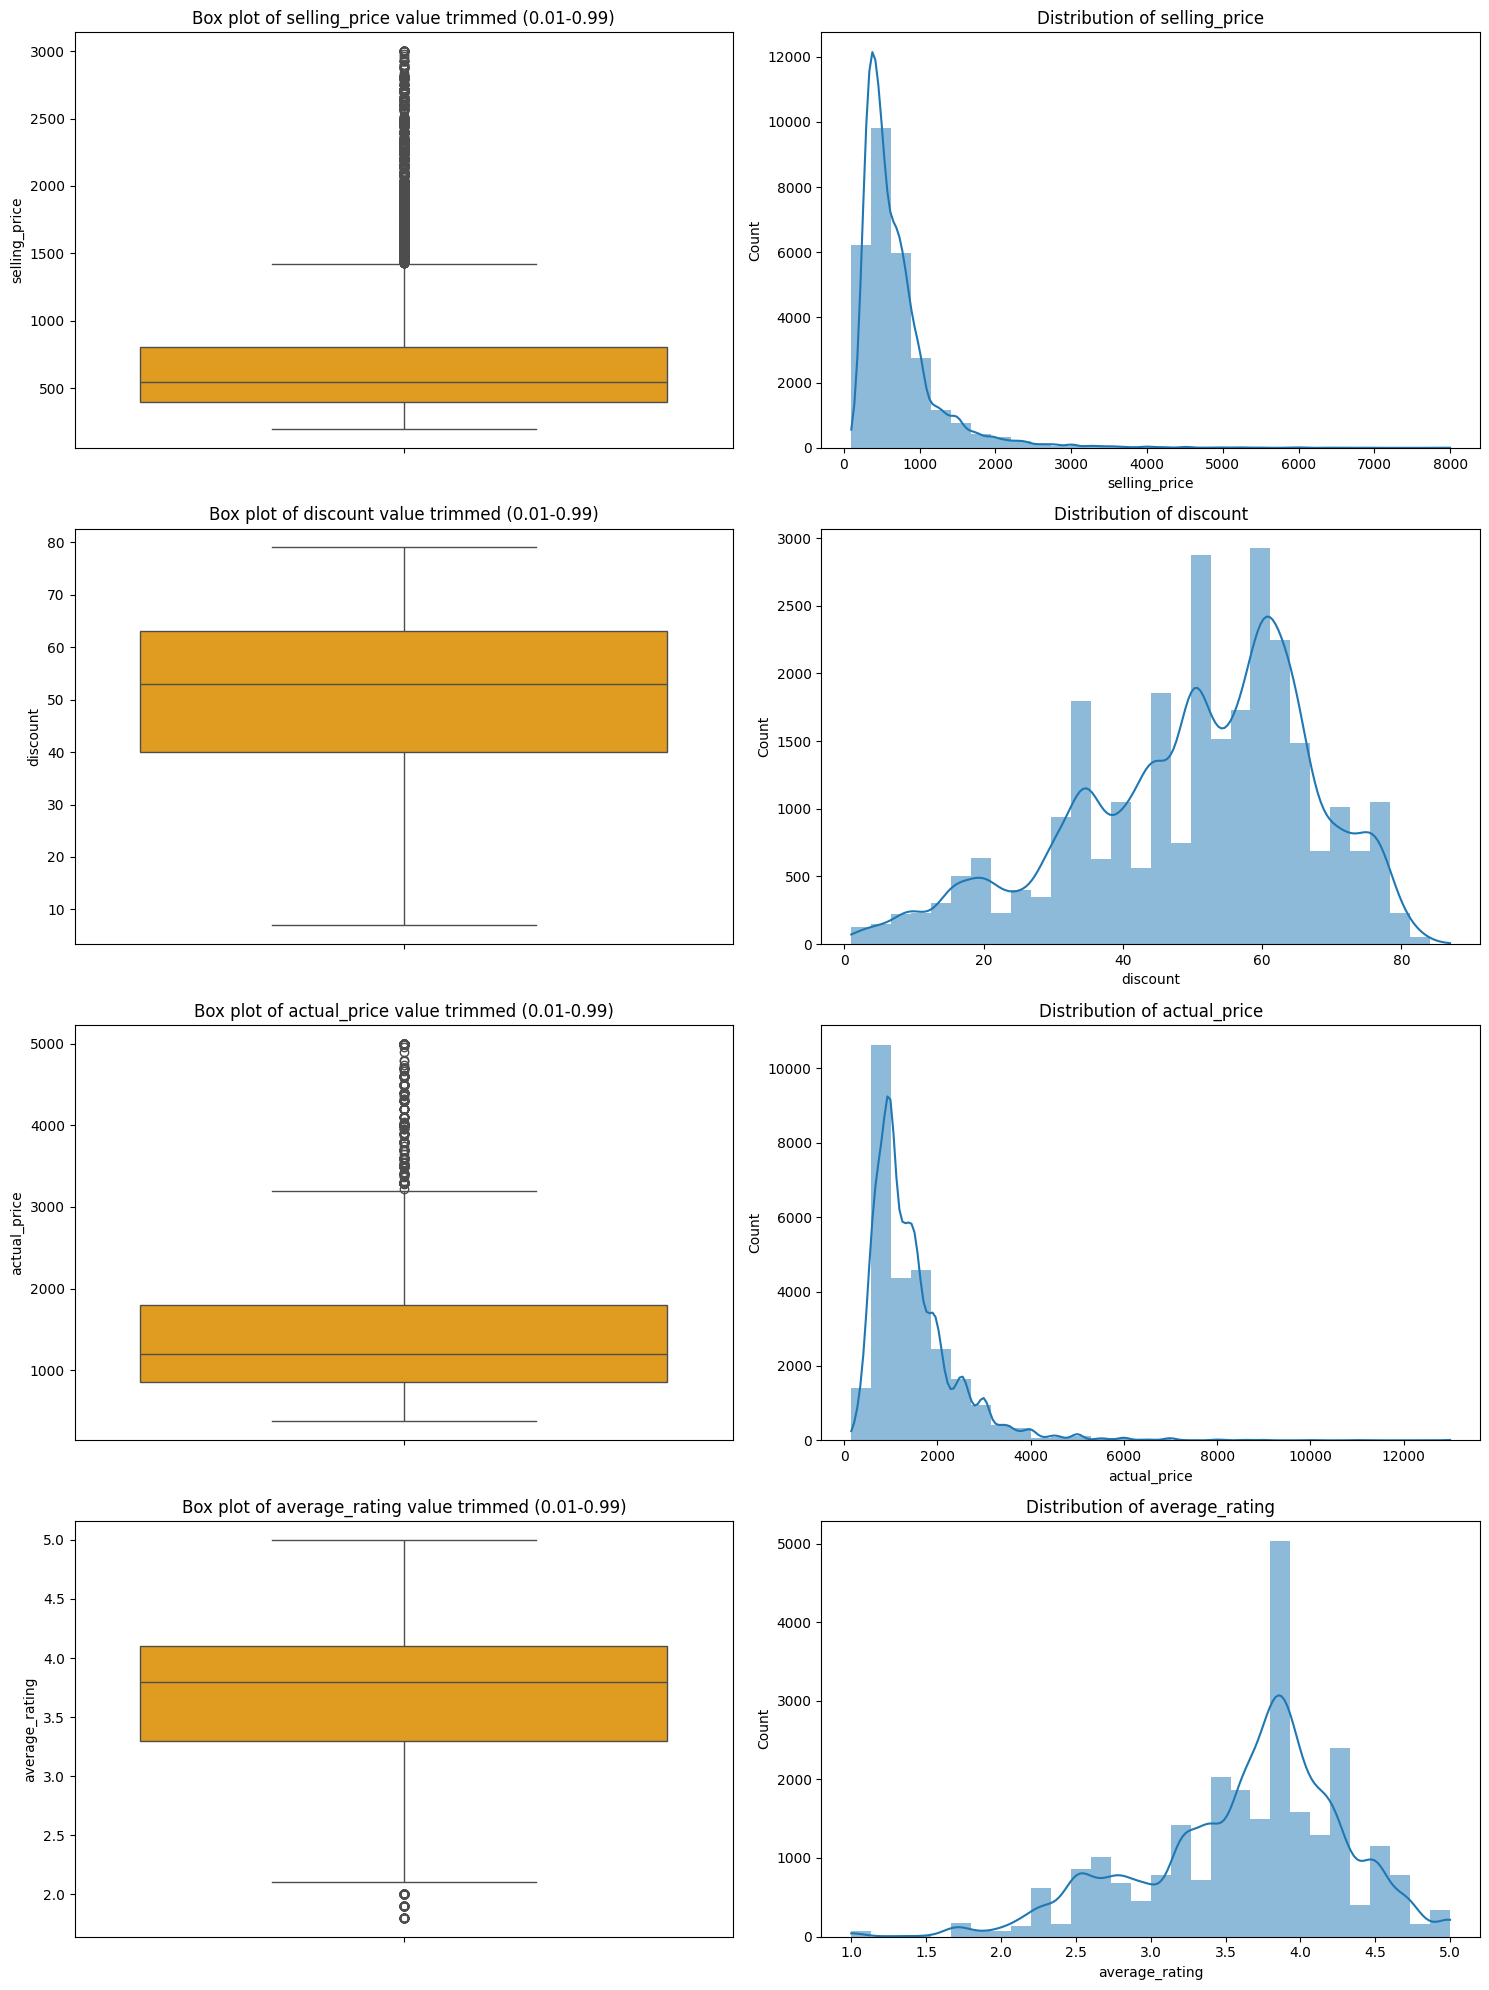

In [ ]:
plot_numerical_variables_analysis(df_fashion_products_06, numerical_columns)

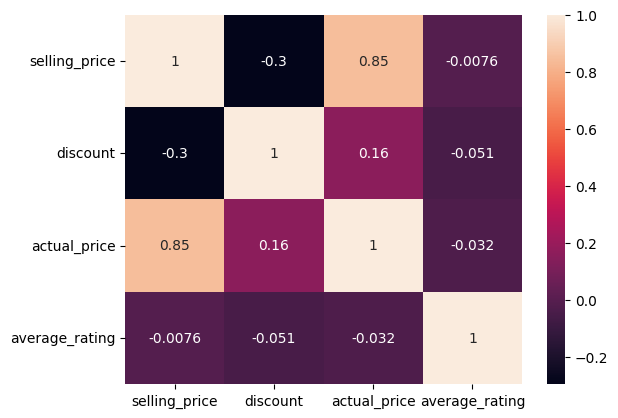

In [ ]:
corr_matrix = df_fashion_products_06[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

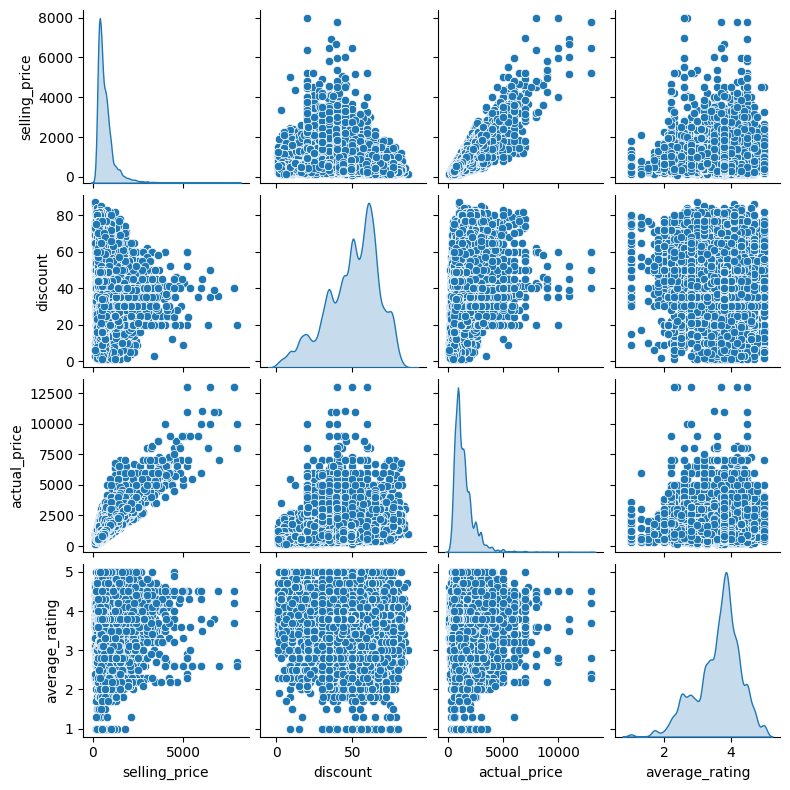

In [ ]:
sns.pairplot(df_fashion_products_06[numerical_columns], height=2, diag_kind="kde", aspect=1)
plt.show()

### Word Counting Distribution

In [ ]:
df_word_counts = pd.DataFrame()
df_word_counts["word_count_title"] = df_fashion_products_06["title"].str.split().str.len()
df_word_counts["word_count_description"]  = df_fashion_products_06["description"].str.split().str.len()
df_word_counts["word_count_document"] = df_fashion_products_06["document"].str.split().str.len()


In [ ]:
df_word_counts_description = df_word_counts.describe().T
display(df_word_counts_description)

,count,mean,std,min,25%,50%,75%,max
word_count_title,28080.0,6.023077,1.762887,1.0,5.0,6.0,7.0,22.0
word_count_description,28080.0,15.414886,19.717730,0.0,0.0,8.0,25.0,206.0
word_count_document,28080.0,33.458796,19.103860,5.0,21.0,27.0,43.0,226.0


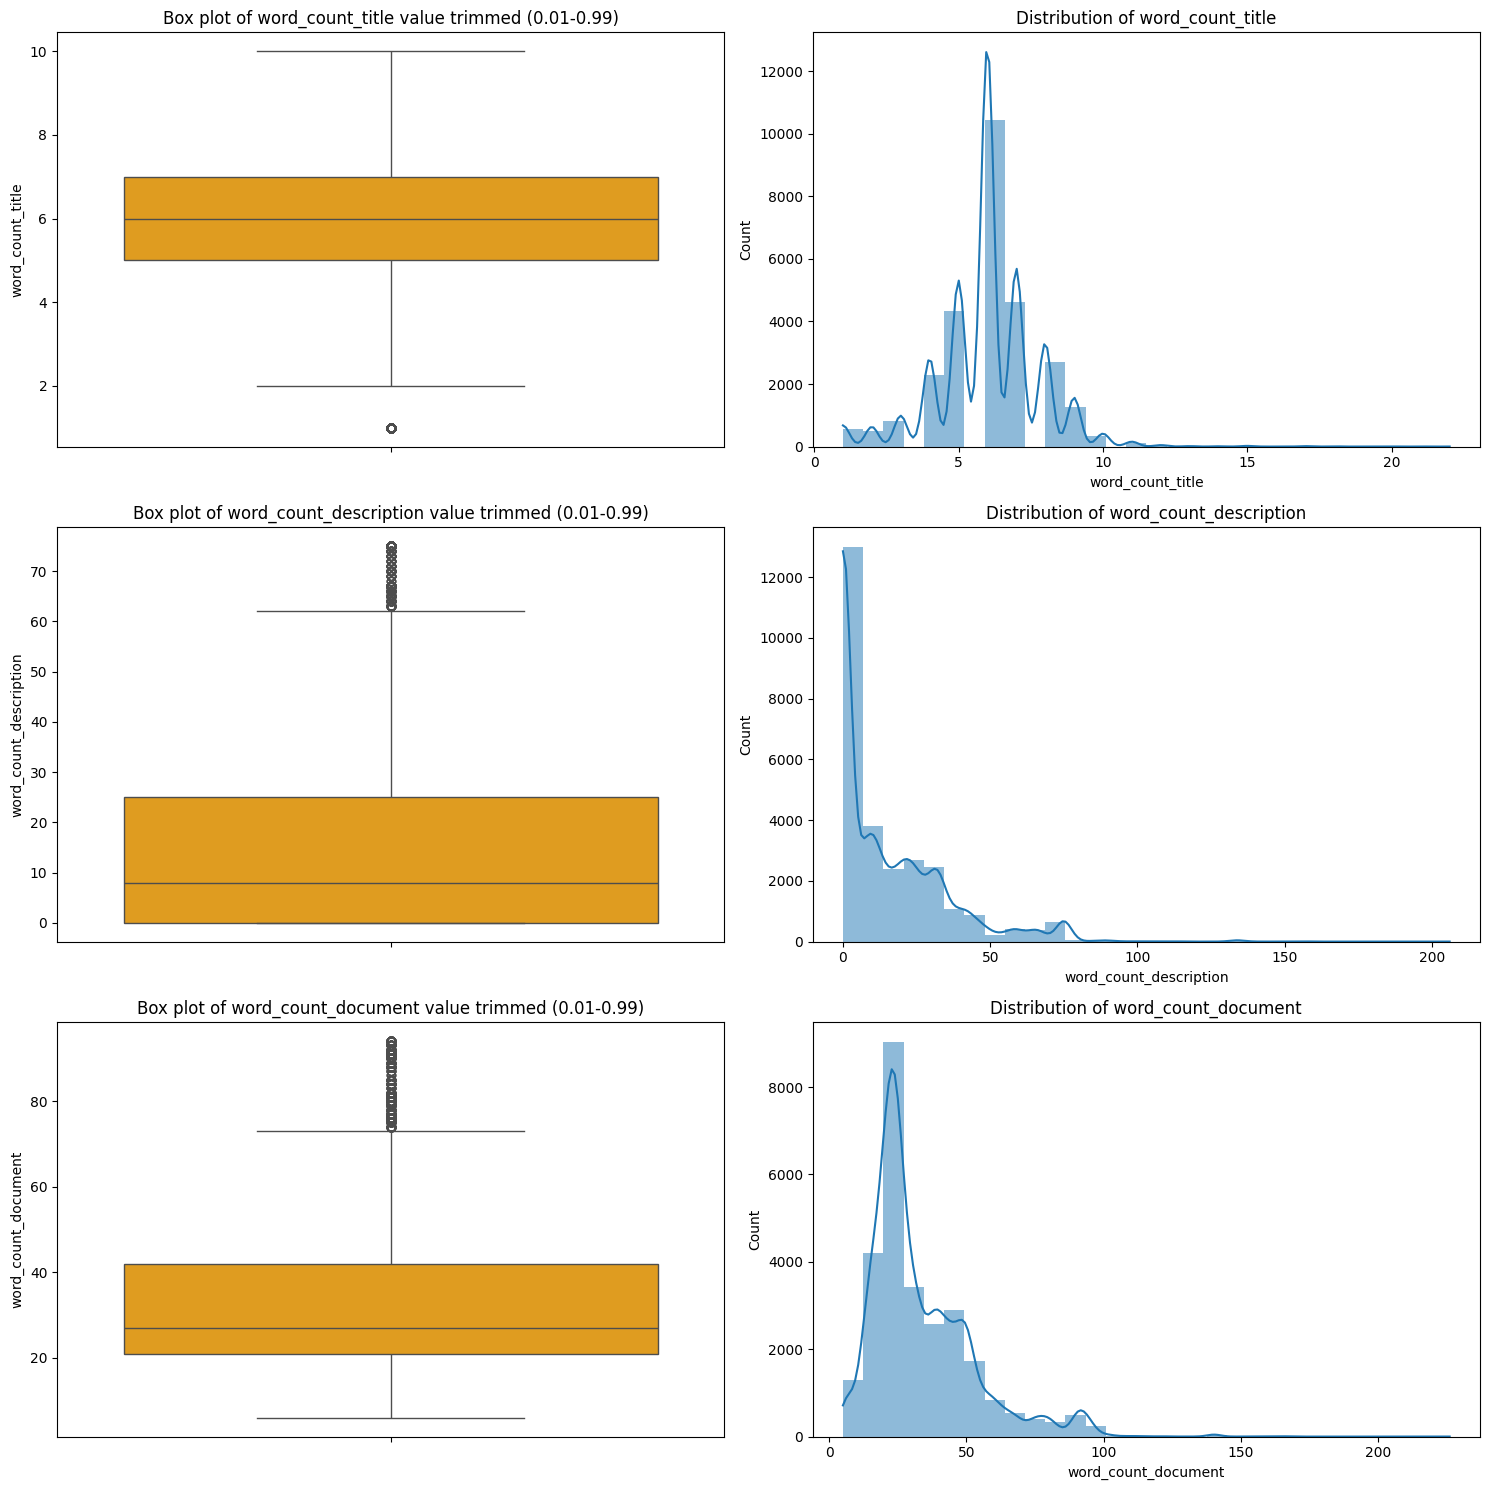

In [ ]:
plot_numerical_variables_analysis(df_word_counts, df_word_counts.columns)

### Ranking of values by feature

In [ ]:
def ranking(df, by, N=10, ascending=False, cols=None):
    cols = cols or df.columns
    return (df.dropna(subset=[by])
              .sort_values(by=by, ascending=ascending)
              .loc[:, cols]
              .head(N))

- Ranking by higher average rating.

In [ ]:
ranking(
    df_fashion_products_06, 
    by="average_rating", 
    N=10, 
    ascending=False,
    cols=["pid","title","brand","average_rating","selling_price"]
)

,pid,title,brand,average_rating,selling_price
22361,BRFFM8J3XCQHKYYA,men pack brief,COL,5.0,385.0
8403,VESFN9F35YWEEHDG,vest pack vip women,,5.0,1108.0
14764,TSHFUEUZDF7J7QDW,graphic women print round t-shirt white neck,TEE BUD,5.0,349.0
13240,BRFFFYHUQGBFXZTG,men pack brief,VIKING.INE,5.0,699.0
10472,SHTFZZFERN6EPZNM,fit collar print slim shirt casual spread men,True Bl,5.0,1119.0
12351,TSHFKH7VZA54W6UF,hood women print t-shirt neck black,ATTIITU,5.0,1499.0
13242,BRFFFEH4B6JVT5A5,men pack brief,VIKING.INE,5.0,699.0
12349,TSHFGMGPBJXHH3XZ,grey hood print t-shirt neck men,ATTIITU,5.0,499.0
12348,TSHFCWYJYURDMMBU,grey women round solid t-shirt neck black,ATTIITU,5.0,449.0
10470,TSHFQ4FWQ42YYX9F,polo women solid t-shirt neck red,True Bl,5.0,599.0


- Ranking by lower selling price.

In [ ]:
ranking(
    df_fashion_products_06, 
    by="selling_price", 
    N=10, 
    ascending=True,      
    cols=["pid","title","brand","selling_price","discount"]
) 

,pid,title,brand,selling_price,discount
16485,SOCET7QRNHYG9HHB,crew pack mid-calf women,Welwe,99.0,50.0
20435,BDAFUBD2EJHFCRNC,print men bandana,T10 Spor,99.0,50.0
7654,SOCFFGA2FYZQBFXT,women color ankl length pack block,your shopping sto,118.0,76.0
24438,SOCFZ7GFAZGYZGR7,solid length ankl pack men,ina gro,120.0,69.0
24437,SOCFZAGJC3VUFQU9,women solid length ankl pack,ina gro,120.0,69.0
24439,SOCFZ7JX39ZEW8GE,women solid length ankl pack,ina gro,120.0,69.0
20253,CAPEX5YHPH3MSGFC,cotton panel basebal cap,T10 Spor,124.0,50.0
16402,SUSECSFFVNKG5VGG,y- brand back suspend men trunk black,,125.0,74.0
906,TSHF5FRXKGF6A4FH,women print round t-shirt white neck,Jack Roy,128.0,87.0
25325,SOCFPR9UF8Q4FCHG,men length ankl pack,Pu,132.0,73.0


### Top values by count in features

In [ ]:
def get_top_values(series, N=20):
    return (series.astype(str)
                .str.strip()
                .replace("", pd.NA)
                .dropna()
                .value_counts()
                .head(N))

def get_top_words(series, N=20):
    word_counts = {}
    for text in series.astype(str):
        for word in text.split():
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

    top_words = pd.Series(word_counts).sort_values(ascending=False).head(N)

    return top_words

def plot_top(series, get_top, N=20, top=None):
    counts = get_top(series, N)

    plt.figure(figsize=(8, 5))
    plt.barh(counts.index[::-1], counts.values[::-1])
    plt.title(f"Top {N} {top}" if top else f"Top {N}")
    plt.xlabel("Count")
    plt.ylabel(series.name or "Value")
    plt.tight_layout()
    plt.show()

- Top sellers

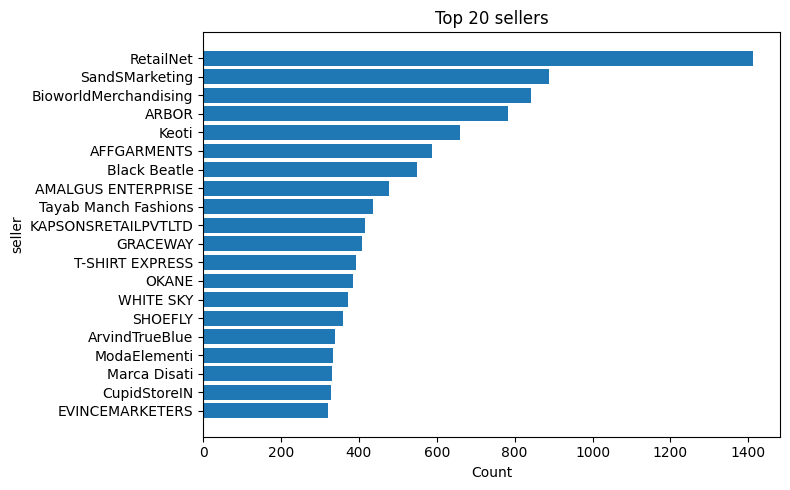

In [ ]:
plot_top(df_fashion_products_06["seller"], get_top_values, N=20, top="sellers")

- Top brands

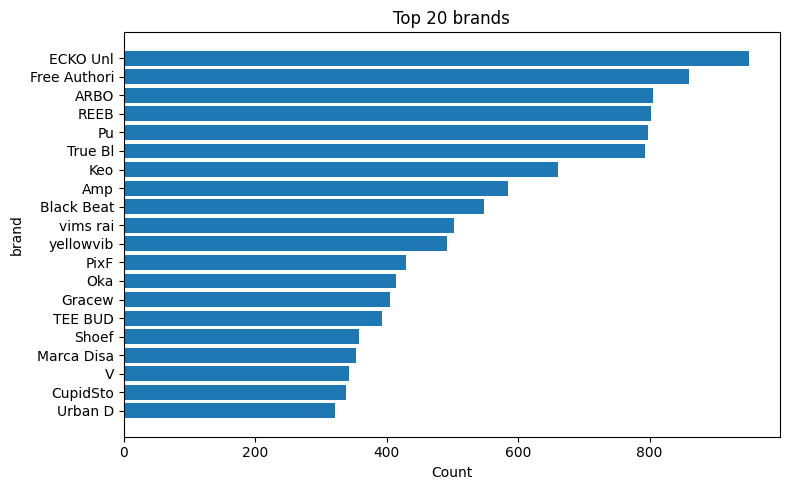

In [ ]:
plot_top(df_fashion_products_06["brand"], get_top_values, N=20, top="brands")

- Top Words

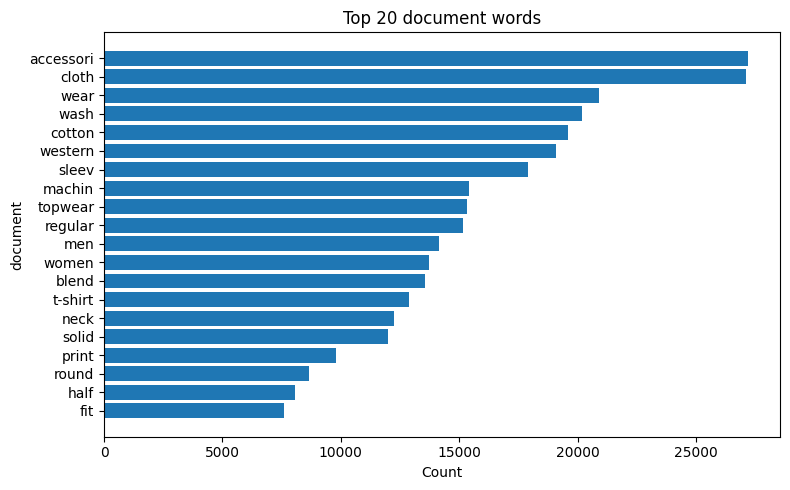

In [ ]:
plot_top(df_fashion_products_06["document"], get_top_words, N=20, top="document words")

### Word Clouds

In [ ]:
def plot_word_cloud(series, get_top, N=20, title=None):
    counts = get_top(series, N=N)
    freq_dict = dict(zip(counts.index, counts.values))

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis', 
        max_words=200
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title or f"Top {N}", fontsize=16)
    plt.show()

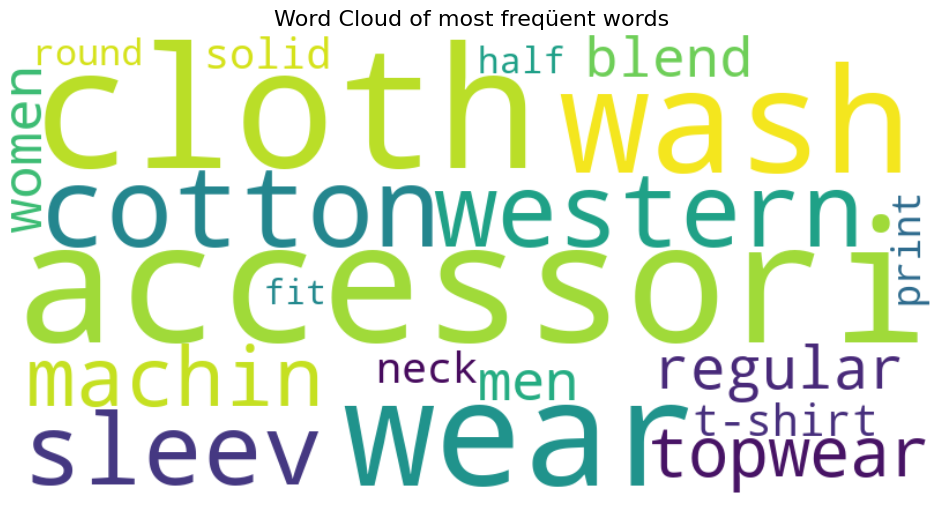

In [ ]:
plot_word_cloud(
    df_fashion_products_06["document"],
    get_top_words,
    N=20,
    title="Word Cloud of most freqüent words"
)

## Saving the cleaned file

Here we store the cleaned version of Fashion Products Datasets

In [ ]:
output_directory = input_directory
os.makedirs(output_directory, exist_ok=True)
output_name = "fashion_products_dataset_processed.csv"
output_path = os.path.join(output_directory, output_name)
df_fashion_products_06.to_csv(output_path, sep=",", index=False, encoding="utf-8")

print(f"Dataframe stored correclty in path: {output_path}")

Dataframe stored correclty in path: ../IRWA-2025-data/fashion_products_dataset_processed.csv


Comparison of file sizes

In [ ]:
print(f"Raw fashion products size in mebibytes: {round(os.path.getsize(input_path) / 1024**2, 2)} MiB")
print(f"Processed fashion products size in mebibytes: {round(os.path.getsize(output_path) / 1024**2, 2)} MiB")

Raw fashion products size in mebibytes: 64.85 MiB
Processed fashion products size in mebibytes: 22.49 MiB
